1\. **Spotting correlations**

Load the remote file:

```bash
https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv
```

with Pandas and create scatter plots with all possible combinations of the following features:
    
  + `features_1`
  + `features_2`
  + `features_3`
  
Are these features correlated? Please add a comment.

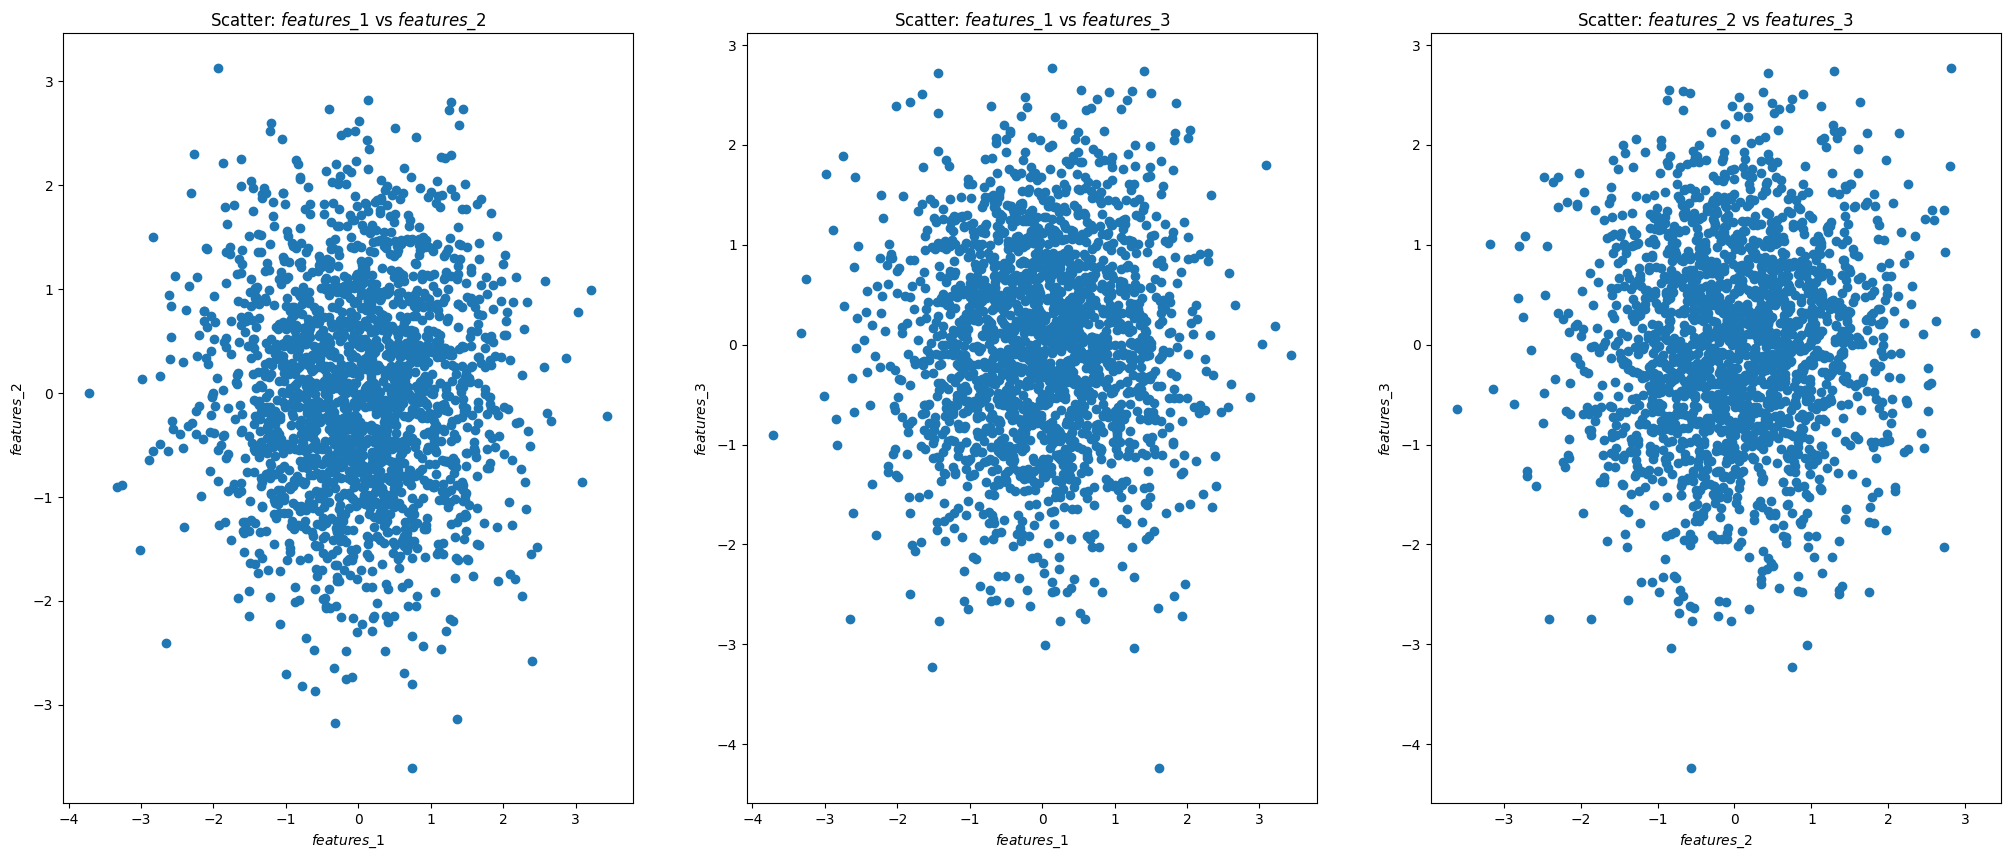

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ! wget https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv

df = pd.read_csv('regression_generated.csv')

fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (25,10))

ax1.scatter(x=df['features_1'], y=df['features_2'])
ax1.set_title('Scatter: $features\_1$ vs $features\_2$')
ax1.set_xlabel('$features\_1$')
ax1.set_ylabel('$features\_2$')

ax2.scatter(x=df['features_1'], y=df['features_3'])
ax2.set_title('Scatter: $features\_1$ vs $features\_3$')
ax2.set_xlabel('$features\_1$')
ax2.set_ylabel('$features\_3$')

ax3.scatter(x=df['features_2'], y=df['features_3'])
ax3.set_title('Scatter: $features\_2$ vs $features\_3$')
ax3.set_xlabel('$features\_2$')
ax3.set_ylabel('$features\_3$')

plt.show()

# According to the plots, there is no significant correlation because the scatter plot is round and it is not strectched in any direction

2\. **Color-coded scatter plot**

Produce a scatter plot from a dataset with two categories.

* Write a function that generates a 2D dataset consisting of 2 categories. Each category should distribute as a 2D gaussian with a given mean and standard deviation. Set different values of the mean and standard deviation between the two samples.
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below:

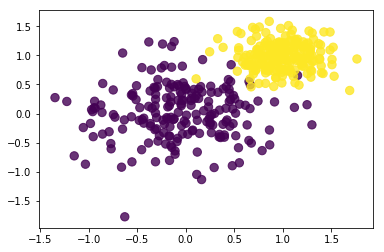

In [ ]:
from IPython.display import Image
Image('images/two_categories_scatter_plot.png')

In [30]:
def category2D(mean, std):
    x = np.random.normal(mean, std, 100)
    y = np.random.normal(mean, std, 100)
    return x, y

def dataset2D(mean, std):
    cat1 = category2D(mean[0], std[0])
    cat2 = category2D(mean[1], std[1])
    ax.scatter(cat1[0], cat1[1], alpha=0.5)
    ax.scatter(cat2[0], cat2[1], alpha=0.5)

[0.3174538  0.61273287]
[0.55847993 0.83150063]


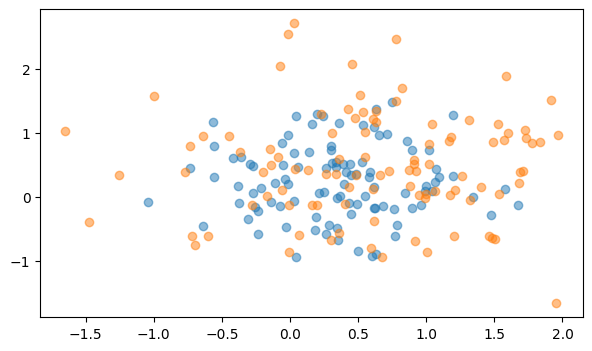

In [33]:
fig, ax = plt.subplots(figsize=(7,4))

mean = np.random.rand(2)
print(mean)
std = np.random.rand(2)
print(std)

dataset2D(mean, std)

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following pickle file:
```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```
* Inspect the dataset, you'll find two variables (features)
* Convert the content to a Pandas Dataframe
* Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
* Plot a Seaborn `jointplot` of "residuals" versus "distances", and use seaborn to display a linear regression.

Comment on the correlation between these variables.

* Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
* Obtain 3 numpy arrays:
  * `x`, the array of bin centers of the profile histogram of the "distance" variable
  * `y`, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * `err_y`, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [34]:
!wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/

--2023-12-02 22:23:29--  https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl
Resolving www.dropbox.com (www.dropbox.com)... 162.125.13.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.13.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/3uqleyc3wyz52tr/residuals_261.pkl [following]
--2023-12-02 22:23:29--  https://www.dropbox.com/s/raw/3uqleyc3wyz52tr/residuals_261.pkl
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucc940f4a833db2ab1252ddad980.dl.dropboxusercontent.com/cd/0/inline/CIpECMJxoE5GOntzkYEJ5JmjKHHvNTqaPUr1wg_V9GoC1rJKGlAw2Hhbm07LHOn0k3fy-ZYQ0wvOjZ8YEg17AjVyqUJoMjHaD0agQYgG0sES2Nh60bmEo_T7aBq4FAZ2bgE/file# [following]
--2023-12-02 22:23:29--  https://ucc940f4a833db2ab1252ddad980.dl.dropboxusercontent.com/cd/0/inline/CIpECMJxoE5GOntzkYEJ5JmjKHHvNTqaPUr1wg_V9GoC1rJKGlAw2Hhbm07LHOn0k3fy-ZYQ0wvOjZ8YEg17AjVyqUJoMjHaD0agQYgG0s

In [43]:
import pickle

file_path = 'data/residuals_261.pkl'
infile = open(file_path, 'rb')
new_dict = pickle.load(infile)
infile.close()

print('\nDataset:', new_dict)

df = pd.DataFrame(new_dict.flatten()[0])
df


Dataset: {'residuals': array([ 1.1       , -1.95      , -7.2       , ...,  0.08333333,
        0.16666667,  0.08333333]), 'distances': array([16. ,  6.3,  3.4, ...,  1.7, 19.1,  2.6])}


,residuals,distances
0,1.100000,16.0
1,-1.950000,6.3
2,-7.200000,3.4
3,-4.150000,8.4
4,-6.590000,1.7
...,...,...
11126,-0.760000,14.4
11127,0.380000,7.5
11128,0.083333,1.7
11129,0.166667,19.1


In [44]:
df = df[np.absolute(df['residuals']) < 2]
df

,residuals,distances
0,1.100000,16.0
1,-1.950000,6.3
8,-0.042857,3.3
9,0.128571,5.3
10,0.085714,15.0
...,...,...
11126,-0.760000,14.4
11127,0.380000,7.5
11128,0.083333,1.7
11129,0.166667,19.1


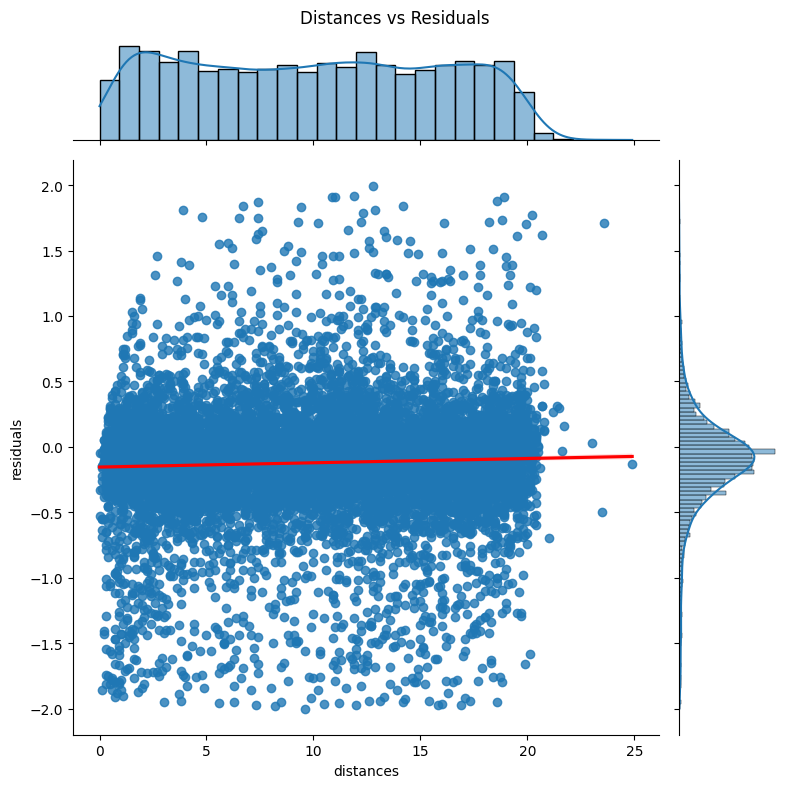

In [45]:
import seaborn as sns
p = sns.jointplot(x="distances", y="residuals", data=df, height = 8, kind = 'reg',joint_kws = {'line_kws':{'color':'red'}})

p.fig.suptitle("Distances vs Residuals")
p.fig.tight_layout()

# According to the plots, the slope of the regression line is almost zero, meaning that there is no significant correlation between the two

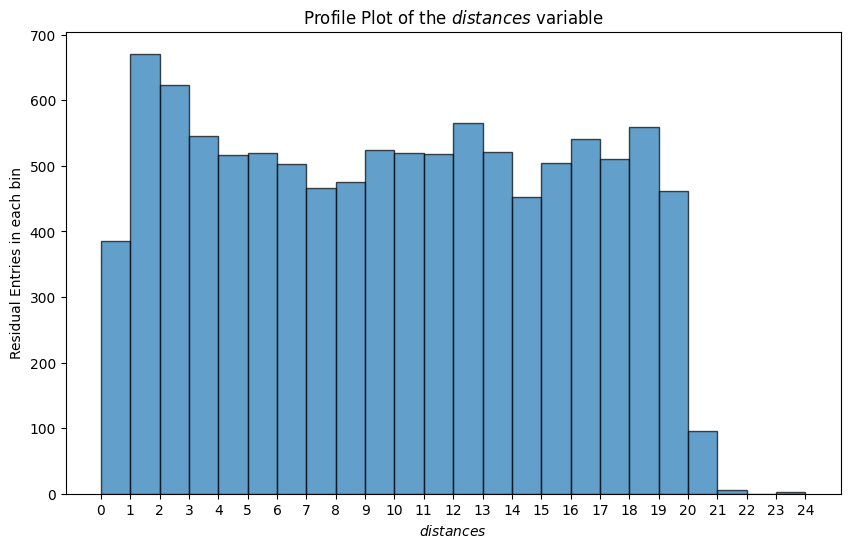

In [46]:
profile_fig = plt.figure(figsize=(10, 6))

x = df['distances']
h, bins, _ = plt.hist(x, bins=np.arange(x.min(),x.max()),alpha = 0.7, edgecolor = 'black')

ax = profile_fig.axes[0]
ax.set_title('Profile Plot of the $distances$ variable')
ax.set_xlabel('$distances$')
ax.set_ylabel('Residual Entries in each bin')

plt.xticks(np.arange(x.min(),x.max(),1.0))
fig.tight_layout()

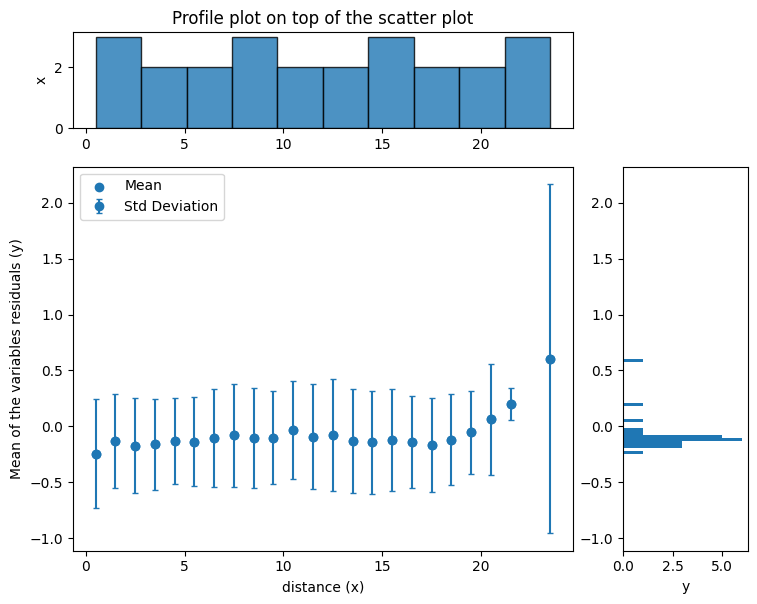

In [47]:
bin_centers = (bins[1:] + bins[:-1])/2
x = bin_centers
residuals = [df.loc[(df['distances'] > i) & (df['distances'] < i+1)] for i in range(len(bins)-1)]
y = np.array([i['residuals'].mean() for i in residuals]) # mean of residuals
err_y = np.array([i['residuals'].std() for i in residuals]) #std deviation of the residuals


profile_fig2= plt.figure(figsize = (8,6))

ax = profile_fig2.add_gridspec(top=0.75, right=0.75).subplots()
ax.set_title('Profile plot on top of the scatter plot')
ax.set_xlabel('distance (x)')
ax.set_ylabel('Mean of the variables residuals (y)')
ax_histx = ax.inset_axes([0, 1.1, 1, 0.25], sharex=ax)
ax_histy = ax.inset_axes([1.1, 0, 0.25, 1], sharey=ax)

ax.scatter(x,y)
ax.errorbar(x,
            y,
            yerr=err_y,
            fmt='o',
            capsize=2)


ax_histx.hist(x, bins=10,alpha = 0.8, edgecolor = 'black')
ax_histy.hist(y, bins=30, orientation='horizontal')
ax_histx.set_ylabel('x')
ax_histy.set_xlabel('y')
ax.legend(('Mean','Std Deviation'), loc = 'upper left')

4\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn):

* Fill a numpy array `x` of length N (with $N=\mathcal{O}(100)$) with a variable normally distributed, with a given mean and standard deviation
* Fill an histogram in pyplot taking proper care of the aesthetic:
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* For every element of `x`, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned. The standard deviation default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with `np.sum()`) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method. Superimpose the normalized sum of all gaussians to the first histogram.


Integral obtained with guassians: 299.99982621840206
Normalization of integral obtained with guassians: 132.60792888475038
Integral of original histogram: 132.60800570085416


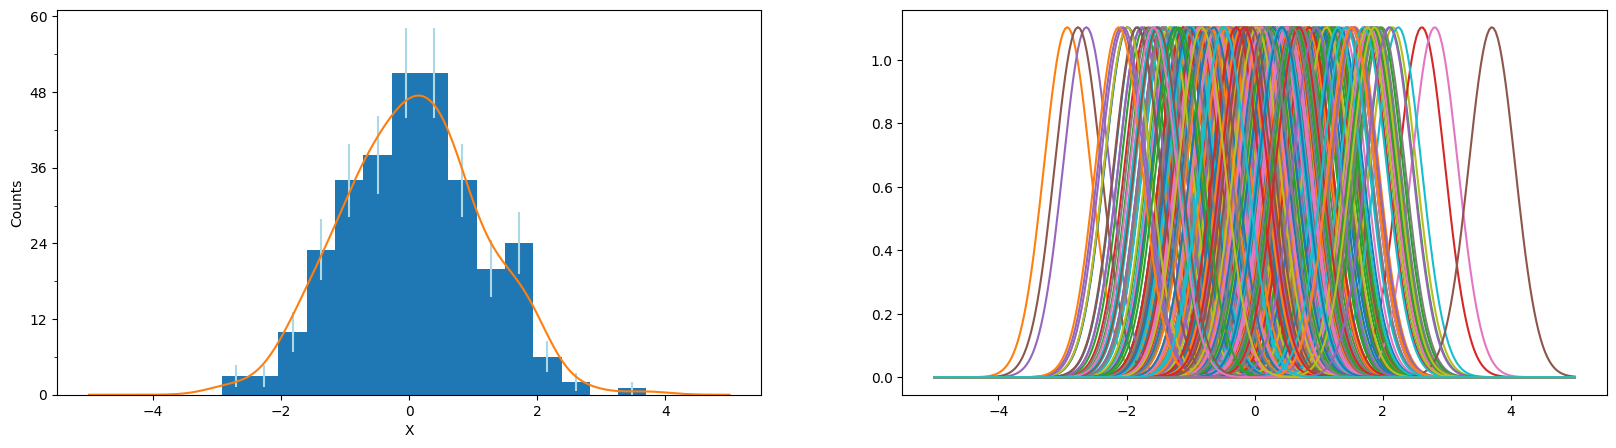

In [57]:
from scipy.stats import norm
import math
from matplotlib.ticker import MultipleLocator

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

x = np.random.normal(0,1,300)

n, bins, _ = ax1.hist(x,15)

ax1.set_xlabel('X')
ax1.set_ylabel('Counts')

majorLocator = MultipleLocator(12)
minorLocator = MultipleLocator(6)
ax1.yaxis.set_major_locator(majorLocator)
ax1.yaxis.set_minor_locator(minorLocator)

dp = np.array([[(bins[i-1]+bins[i])/2 for i in range(1,len(bins))],n,[math.sqrt(n[i]) for i in range(len(n))]])
ax1.errorbar(dp[0,:], dp[1,:], dp[2,:], fmt='none', ecolor='lightblue')

std = 1.06 * x.std() * x.size ** (-1./5.)

X = np.linspace(-5, 5, num=300)
Xpdf=[]

for i in range(len(x)):
    mean = x[i]
    Xpdf.append(norm.pdf(X,mean,std))
    ax2.plot(X, Xpdf[i], '-')

Xpdf = np.array(Xpdf)
pdf = np.sum(Xpdf, axis=0)

bin_width = bins[1]-bins[0]

int_origin = np.sum(n*bin_width)

int_gauss = np.trapz(pdf, X)

ax1.plot(X, pdf*bin_width,'-')

print("Integral obtained with guassians:", int_gauss)
print("Normalization of integral obtained with guassians:", int_gauss * bin_width)
print("Integral of original histogram:", int_origin)